## Introduction 

The purpose of this project is to analyse the superstore dataset while answering various important questions that drives business decision making

In [1]:
# Importing the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# loading the dataset using the pd.read_csv function
superstore = pd.read_csv('superstore_cleaned.csv')
# giving superstore an alias as sc
sc = superstore

In [3]:
# it returns the first 2 rows of the dataset
sc.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## Questions to be answered:

1. Sales distribution
2. Profit distribution
3. Most ordered category of product 
4. Mostly ordered subcategory
5. How product is ordered over the year
6. Relationship between sales, profit and quantity
7. Category and shipped class used, show the distribution.
8. Most ordered category of product in each region
9. Segment of buyers in each Region
10. Sub-category and which category they belong to
11. Sales made in each region
12. Profit made in each region
13. Sales made from each category
14. Profit made from each category
15. States with loss (negative profit)


In [4]:
# dtype is used to check the data types of the columns
sc.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

### 1. Sales distribution

In [5]:
# columns is used to identify the columns in the dataset
sc.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

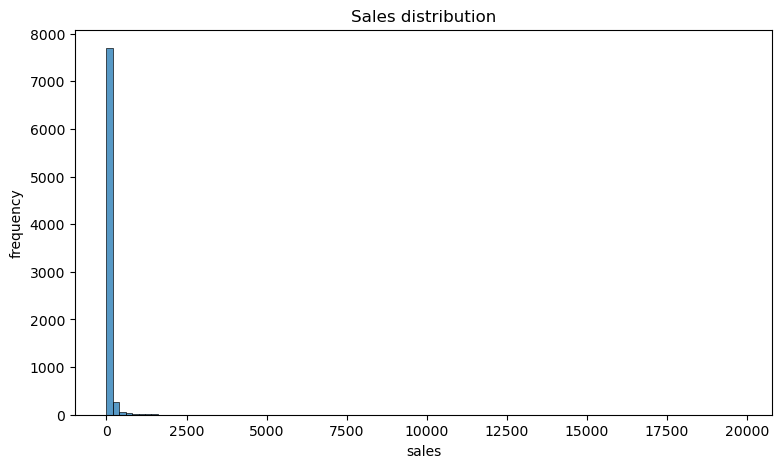

In [6]:
# Visualizing the distribution of sales
plt.figure(figsize=(9,5))
# np.arange is used to specify the starting, end point and stepwise distribution of the bins
sb.histplot(sc['profit'], bins =np.arange(0, 20000, 200))
plt.xlabel('sales')
plt.ylabel('frequency')
plt.title('Sales distribution')
plt.show()

It is evident from the chart that sales are concentrated in the range of 0 to 2500, with the highest frequency occurring within the 0 to 200 bin

### 2. Profit distribution 

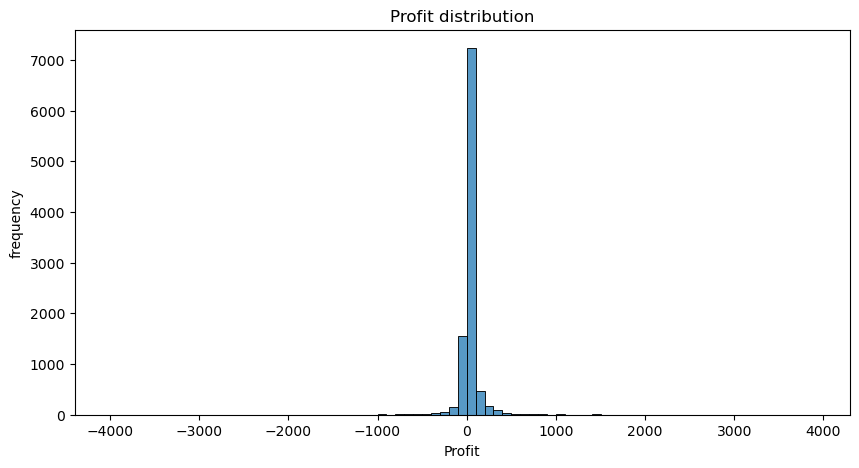

In [7]:
# Visualizing the distribution
plt.figure(figsize=(10,5))
sb.histplot(sc['profit'], bins =np.arange(-4000, 4000,100))
plt.xlabel('Profit')
plt.ylabel('frequency')
plt.title('Profit distribution')
plt.show()

The profit is notably concentrated in the bin range of -1000 to 1000, with a significant portion of profits being earned within this interval

### 3. Most ordered category of product 

In [8]:
sc.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [9]:
category_ordered = sc.groupby('product_name')['category'].value_counts().sort_values(ascending = False).head(1)
print(category_ordered)
print('\n')
print( 'The most ordered category of product is Office supplies')

product_name     category       
Staple envelope  Office Supplies    48
Name: category, dtype: int64


The most ordered category of product is Office supplies


### 4. Mostly ordered subcategory

In [10]:
sub_category_ordered = sc.groupby('product_name')['sub_category'].value_counts().sort_values(ascending = False).head(1)
print(sub_category_ordered)
print('\n')
print( 'The most ordered sub_category of product is Envelopes')

product_name     sub_category
Staple envelope  Envelopes       48
Name: sub_category, dtype: int64


The most ordered sub_category of product is Envelopes


### 5. How product is ordered over the year

In [11]:
# converting the order_date and ship date column to datetime data type
sc['order_date'] = pd.to_datetime(sc['order_date'])
sc['order_date']

sc['ship_date'] = pd.to_datetime(sc['ship_date'])
sc[['ship_date','product_name']]
sc.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


   order_year  product_id
3        2017        3312
2        2016        2587
1        2015        2102
0        2014        1993


The year 2017 records the highest year when products are highly ordered


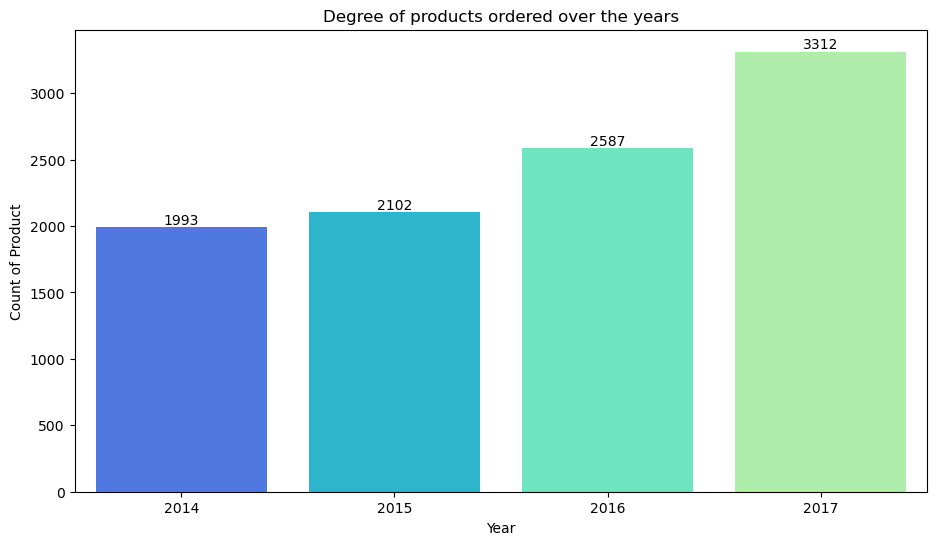

In [26]:
# df['date'].dt.year # Extract the year
# df['date'].dt.month # Extract the month
# df['date'].dt.day_of_week()
sc['order_year'] = sc['order_date'].dt.year
products_over_the_year = sc.groupby('order_year')['product_id'].count().reset_index()
products_over_the_year.sort_values('product_id', ascending = False, inplace = True)

print(products_over_the_year)
print('\n')
print('The year 2017 records the highest year when products are highly ordered')

# Visualizing the result
plt.figure(figsize=(11,6))
sb.set_palette('rainbow')
ax = sb.barplot(data =products_over_the_year, x ='order_year', y = 'product_id', errwidth = 0)

# Assigning the bar values to each bar
ax.bar_label(ax.containers[0])

plt.xlabel('Year')
plt.ylabel('Count of Product')
plt.title('Degree of products ordered over the years')
plt.show()

The diagram above reveals a notable trend: the number of products ordered has experienced exponential growth from the year 2014 to 2017

### 6. Relationship between sales, profit and quantity

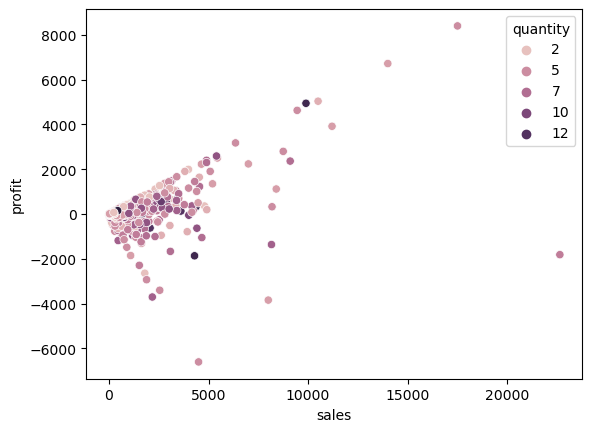

As sales increase, the corresponding profit margin decreases


In [27]:
# Using scatter plot to visualize the relationship between three (3) quantitative variables
sb.scatterplot(data = sc, x = 'sales', y = 'profit', hue = 'quantity')
plt.show()
print ('As sales increase, the corresponding profit margin decreases')

In [14]:
sc.sample(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,order_year
8289,8290,CA-2014-156244,2014-08-12,2014-08-16,Standard Class,DH-13675,Duane Huffman,Home Office,United States,Miami,...,South,OFF-AP-10002403,Office Supplies,Appliances,Acco Smartsocket Color-Coded Six-Outlet AC Ada...,211.248,6,0.2,15.8436,2014
8959,8960,CA-2017-150266,2017-11-25,2017-11-30,Standard Class,RO-19780,Rose O'Brian,Consumer,United States,Houston,...,Central,OFF-AP-10002867,Office Supplies,Appliances,Fellowes Command Center 5-outlet power strip,67.840,5,0.8,-179.7760,2017


### 7. Category and shipped class used, show the distribution.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


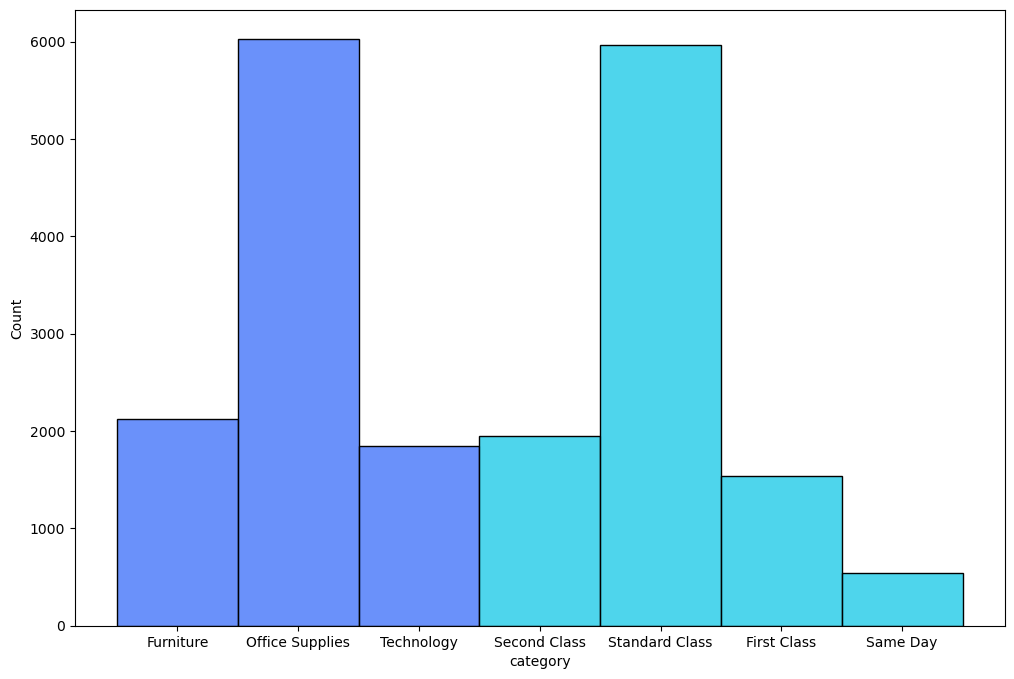

In [15]:
# showing the distribution of category and ship mode distribution
# sb.histplot(data = sc, x = 'category', y = 'ship_mode')
plt.figure(figsize= (12,8))
cat = sb.histplot(data = sc, x = 'category')
print(cat)
mode = sb.histplot( data = sc, x = 'ship_mode')
print(mode)



### 8. Most ordered category of product in each region

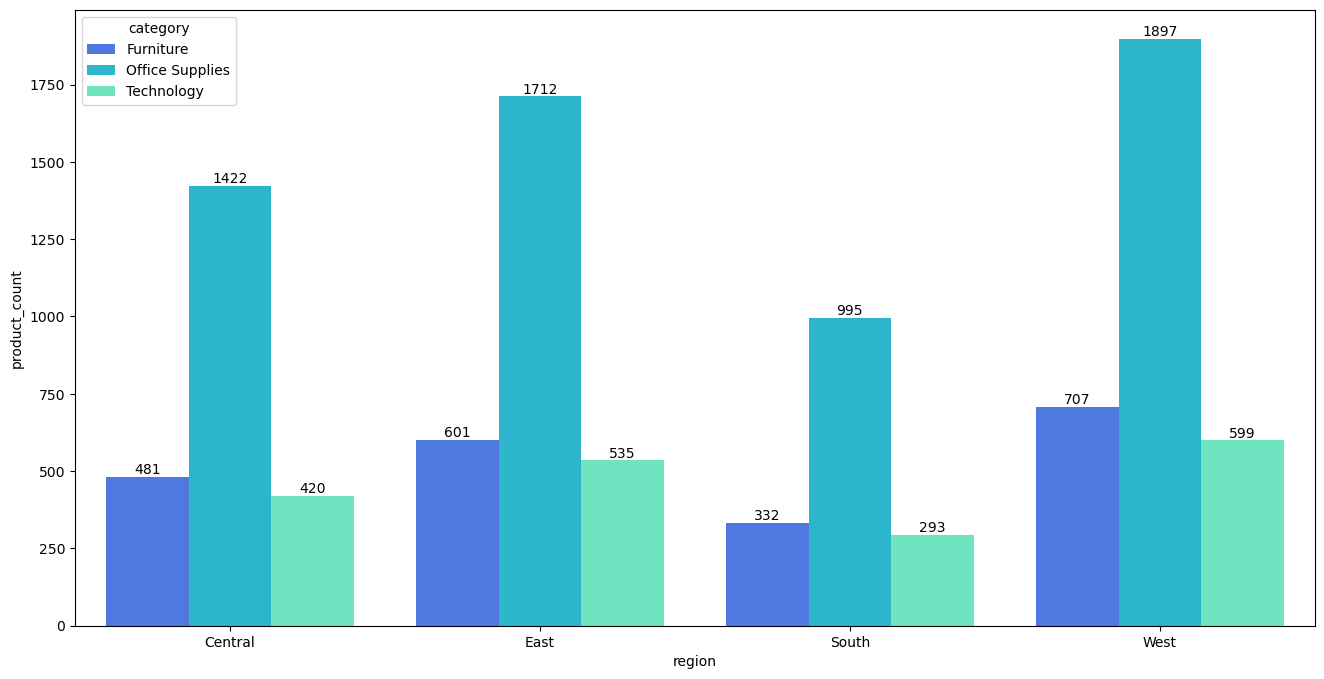

Office supplies emerge as the most frequently ordered category across all regions, with the West region leading in terms of order frequency


In [28]:
ordered_product = sc.groupby(['region', 'category'])['product_name'].count().to_frame(name = 'product_count').reset_index()
ordered_product

# visualizing the data
plt.figure(figsize=(16,8))
ax = sb.barplot(data = ordered_product, x = 'region', y ='product_count', hue = 'category',errwidth=0)
# Assiging labels to each category of product in their respective regions
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
print('Office supplies emerge as the most frequently ordered category across all regions, with the West region leading in terms of order frequency')

### 9. Segment of buyers in each Region

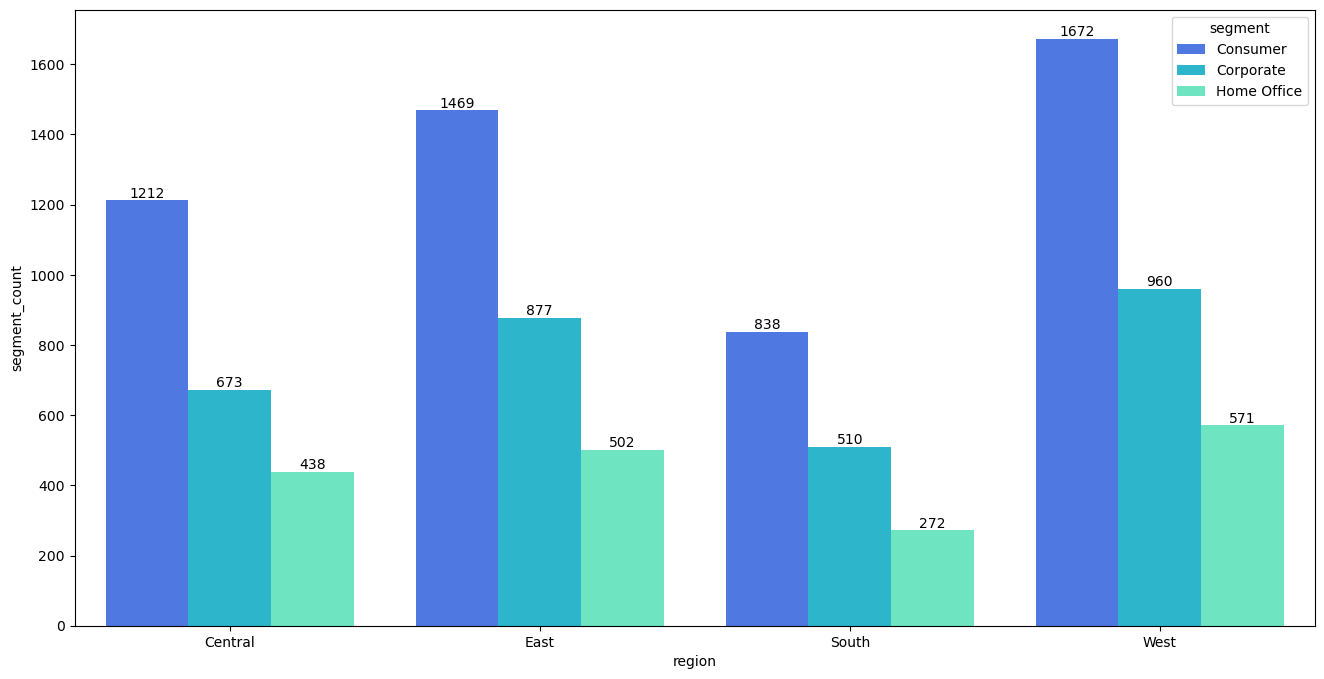

For each region, Consumers are the highest segment of buyers of products


In [30]:
segment_of_buyers = sc.groupby('region')['segment'].value_counts().to_frame(name = 'segment_count').reset_index()
segment_of_buyers

# visualizing the data
sb.set_palette('rainbow')
plt.figure(figsize=(16,8))
ax = sb.barplot(data = segment_of_buyers, x = 'region', y = 'segment_count', hue = 'segment', errwidth= 0 )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
print('For each region, Consumers are the highest segment of buyers of products')

### 10. Sub-category and which category they belong to

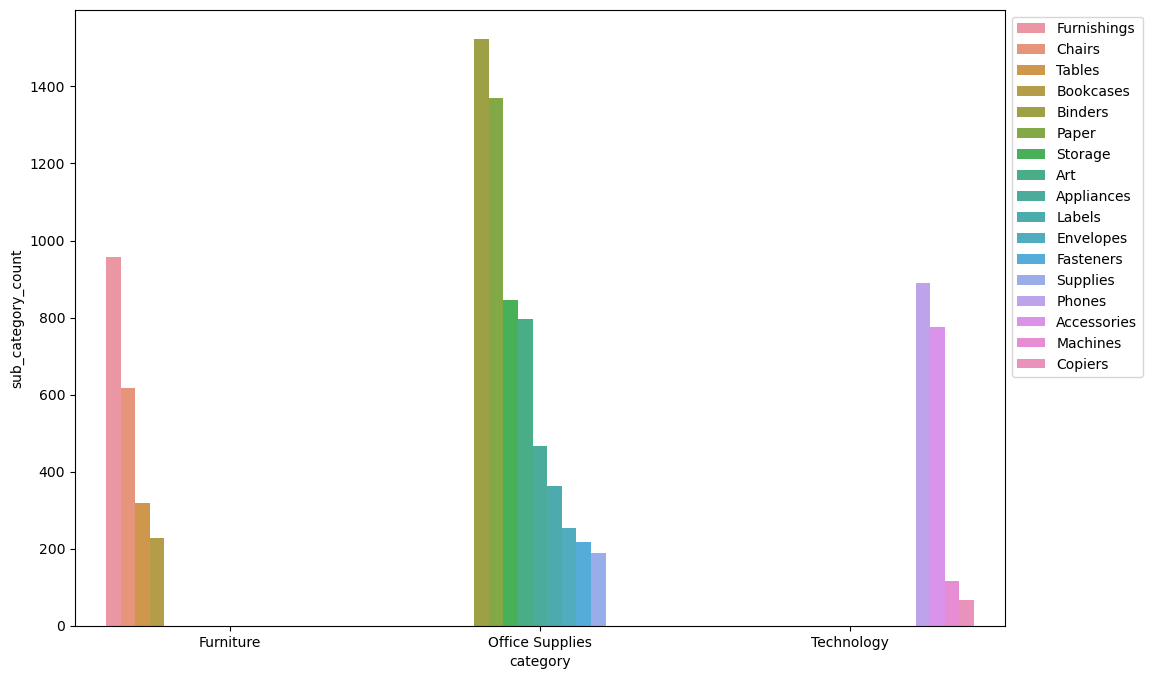

Furnishings rank as the most abundant products within the Furniture category, while Binders dominate the Office Supplies category.
In the Technology category, Phones claim the highest number of products 


Upon thorough analysis of the datasets, a noteworthy observation emerged: despite 
Furnishings ranking as the category with the highest number of products in the Furniture category, 
it does not appear among the top 10 sales. However, it holds the 9th position in terms of profitability.
This insight suggests that little to no discount may have been offered for the Furnishings product, contributing to its profitability 
despite not being among the highest in sales


In [33]:
sub_cat = sc.groupby('category')['sub_category'].value_counts().to_frame(name = 'sub_category_count').reset_index()
sub_cat

# Visualizing the dataset
plt.figure(figsize=(12,8))
sb.barplot(data = sub_cat, x = 'category', y = 'sub_category_count', hue = 'sub_category')
# the loc is used to specify the location of the legend while the bbox_to_anchor is used to move the legend out of the chart area
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()
print('Furnishings rank as the most abundant products within the Furniture category, while Binders dominate the Office Supplies category.\nIn the Technology category, Phones claim the highest number of products ')
print('\n')
print("Upon thorough analysis of the datasets, a noteworthy observation emerged: despite \nFurnishings ranking as the category with the highest number of products in the Furniture category, \nit does not appear among the top 10 sales. However, it holds the 9th position in terms of profitability.\nThis insight suggests that little to no discount may have been offered for the Furnishings product, contributing to its profitability \ndespite not being among the highest in sales")

In [19]:
most_sold_product = sc.groupby('sub_category')['sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 sub category with most sales')
print(most_sold_product)
print('\n')
most_profitable_product = sc.groupby('sub_category')['profit'].sum().sort_values(ascending=False).head(10)
print('Top 10 most profitable sub category')
print(most_profitable_product)

Top 10 sub category with most sales
sub_category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: sales, dtype: float64


Top 10 most profitable sub category
sub_category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: profit, dtype: float64


### 11. sales made in each region

region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64


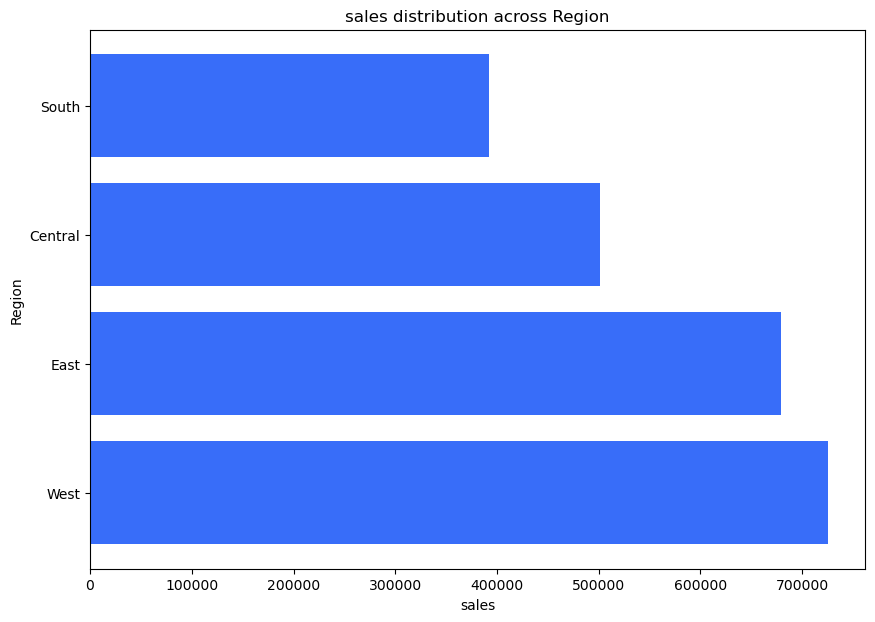

In [20]:
# creating a function for the distribution of Quantitative variable across region
def distribution_across_region(distribution):
    Disc = sc.groupby('region')[distribution].sum().sort_values(ascending = False)
    print(Disc)
    plt.figure(figsize=(10,7))
    plt.barh(width = Disc.values, y = Disc.index, data = Disc)
    plt.xlabel(distribution)
    plt.ylabel('Region')
    plt.title(f'{distribution} distribution across Region')
    plt.show
    
distribution_across_region('sales')

### 12. profit made in each region

region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


The west records the highest no of sales and profit made


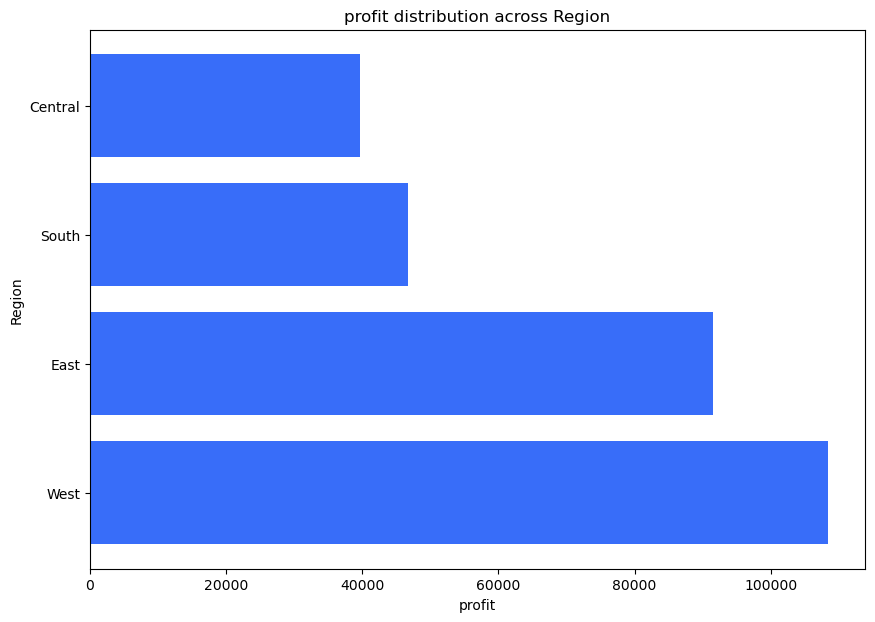

In [21]:
# def distribution_across_region(distribution):
#     sc.groupby('region')[distribution].sum().sort_values(ascending = False).plot(kind = 'bar')
# distribution_across_region('profit')

distribution_across_region('profit')
print('\n')
print('The west records the highest no of sales and profit made')

### 13. Sales made from each category

          category        sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


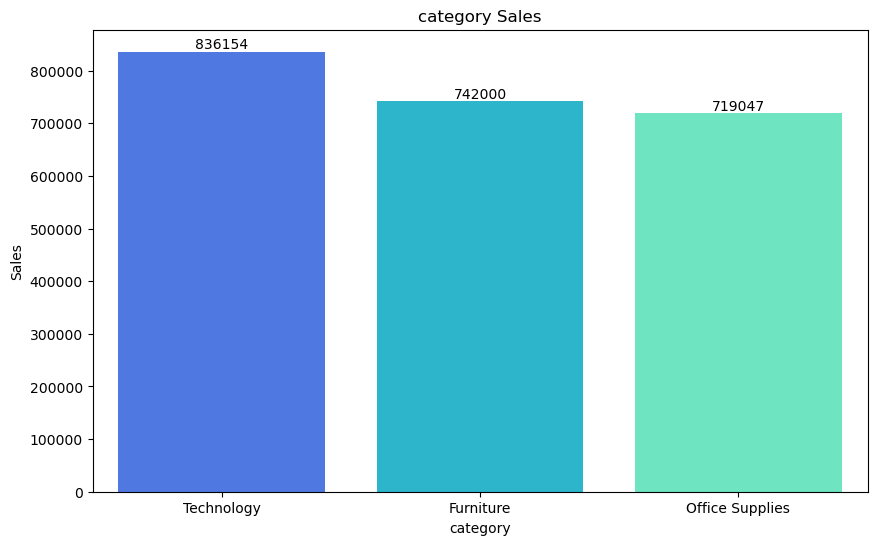

In [22]:

sales_category = sc.groupby('category')['sales'].sum().to_frame().reset_index()
sales_category.sort_values(by = 'sales', ascending = False, inplace = True)
print(sales_category)
# Visualizing
plt.figure(figsize= (10,6))
ax = sb.barplot(x= 'category', y = 'sales', data = sales_category)
ax.bar_label(ax.containers[0])
plt.xlabel('category')
plt.ylabel('Sales')
plt.title('category Sales')
plt.show()

### 14. Profit made from each category

          category       profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


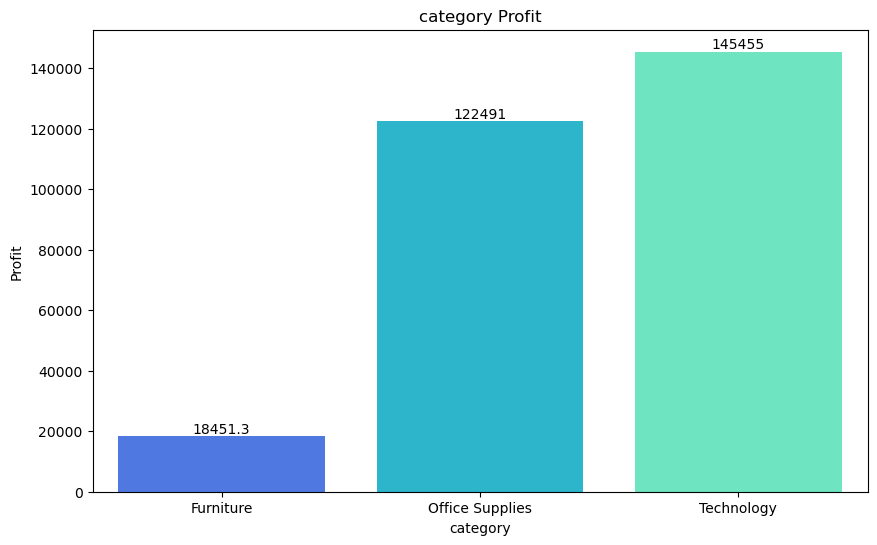

In [23]:
sales_category = sc.groupby('category')['profit'].sum().to_frame().reset_index()
print(sales_category)
# Visualizing
plt.figure(figsize= (10,6))
ax = sb.barplot(x= 'category', y = 'profit', data = sales_category)
ax.bar_label(ax.containers[0])
plt.xlabel('category')
plt.ylabel('Profit')
plt.title('category Profit')
plt.show()

The category with the second-highest sales is Furniture, yet it ranks as the least profitable. This discrepancy may be attributed to substantial discounts on each product, driving increased sales but diminishing overall profitability. Alternatively, other factors could be influencing this outcome. A more in-depth analysis of the dataset is warranted to gain a comprehensive understanding of the contributing factors.

### 15. States with loss (negative profit)

            state sub_category        loss
0           Texas      Binders -14705.0738
1            Ohio     Machines -11770.9447
2        Illinois      Binders  -7204.3242
3           Texas   Appliances  -6147.2225
4  North Carolina     Machines  -5384.8086
5    Pennsylvania      Binders  -4570.9750
6        New York       Tables  -4535.6408
7        Colorado     Machines  -4384.2554
8        Illinois       Tables  -4309.7447
9    Pennsylvania       Phones  -3819.7516


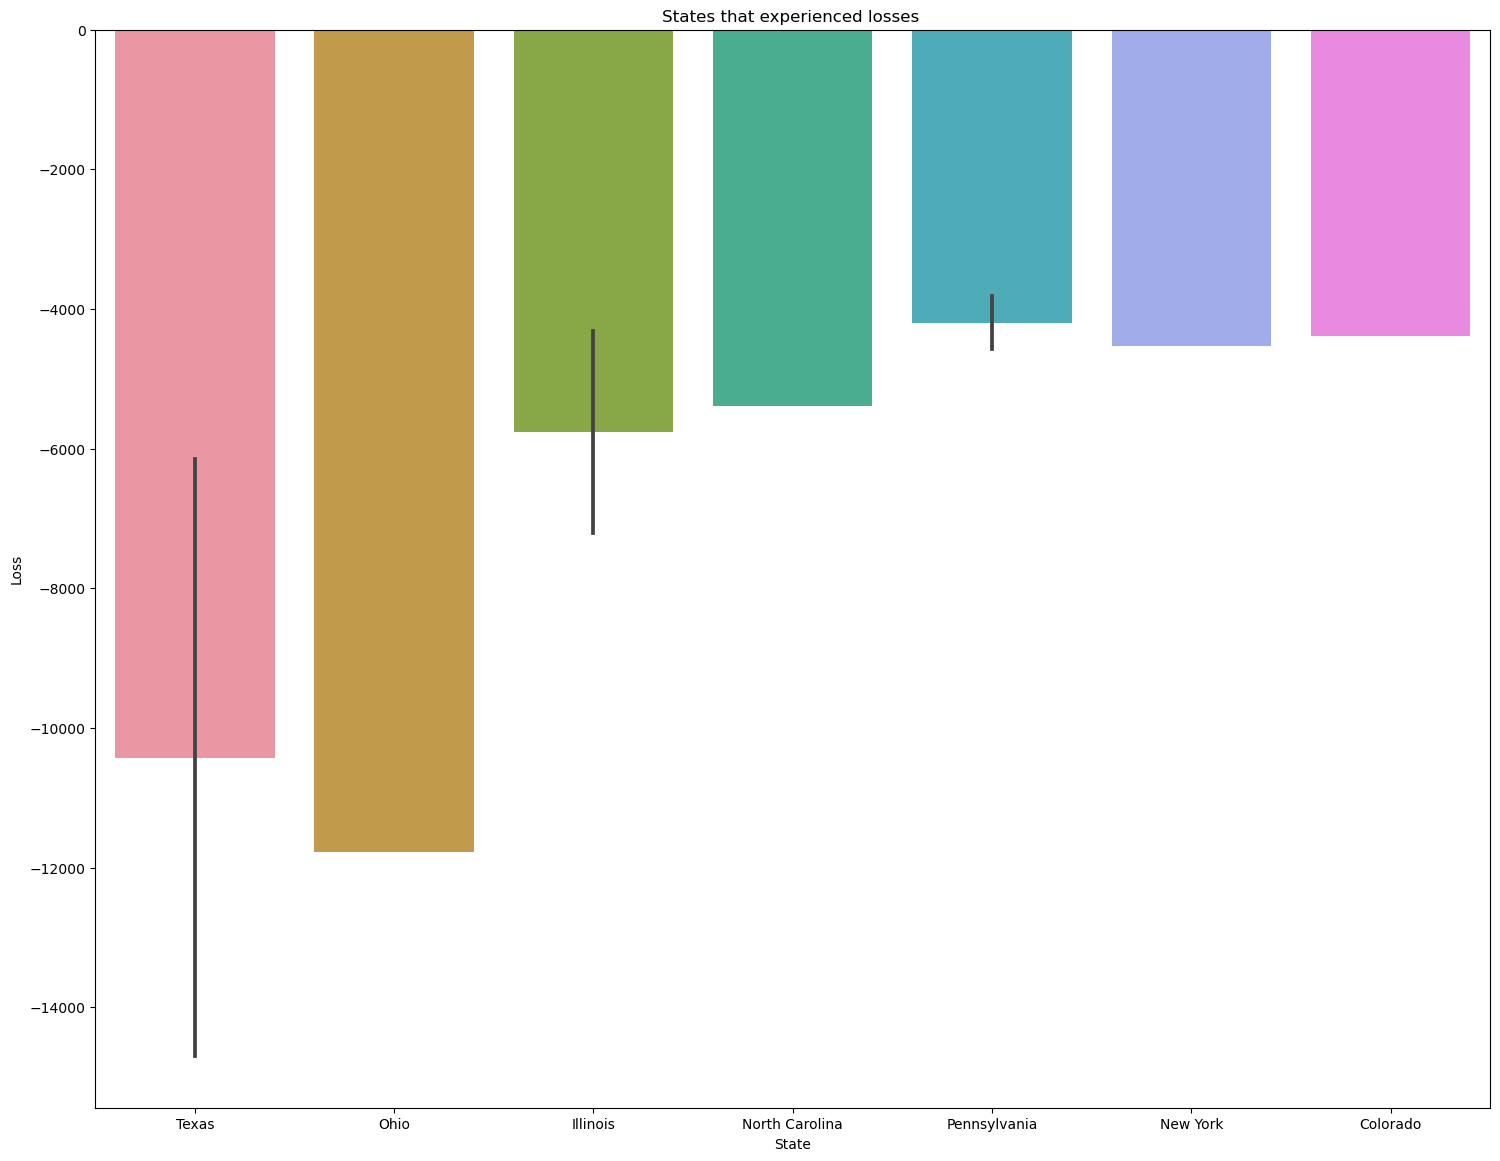

Texas records the state with the highest loss, potentially attributed to a combination of factors.
Economic conditions, including downturns or recessions, could impact consumer spending,
while market saturation, intensified competition, and operational challenges may further contribute to decreased sales
and profitability. Additionally, substantial discounts on products in the region might be exacerbating the financial setback,
as these factors collectively create a complex landscape influencing Texas' business performance


In [36]:
# States with losses 
states_loss = sc.query(" profit < 0 ").groupby(['state','sub_category'])['profit'].sum().sort_values().to_frame(name = 'loss').reset_index().head(10)
print(states_loss)

plt.figure(figsize=(18,14))
sb.barplot(data = states_loss, x = 'state', y = 'loss')
plt.xlabel('State')
plt.ylabel('Loss')
plt.title('States that experienced losses ')
plt.show()

print("Texas records the state with the highest loss, potentially attributed to a combination of factors.\nEconomic conditions, including downturns or recessions, could impact consumer spending,\nwhile market saturation, intensified competition, and operational challenges may further contribute to decreased sales\nand profitability. Additionally, substantial discounts on products in the region might be exacerbating the financial setback,\nas these factors collectively create a complex landscape influencing Texas' business performance")

In [1]:
##sc.groupby(['region','state', 'sub_category'])['discount'].sum().sort_values(ascending =False).to_frame(name = 'discount').reset_index()

In [37]:
Top_10_products_loss_by_region_Texas = sc.query(" profit < 0 & state == 'Texas'").groupby(['region','state','sub_category','discount'])['profit'].sum().sort_values().to_frame(name = 'loss').reset_index().head(10)
Top_10_products_loss_by_region_Texas

,region,state,sub_category,discount,loss
0,Central,Texas,Binders,0.80,-14705.0738
1,Central,Texas,Appliances,0.80,-6147.2225
2,Central,Texas,Furnishings,0.60,-3312.6786
3,Central,Texas,Machines,0.40,-2884.6500
4,Central,Texas,Chairs,0.30,-2515.6490
5,Central,Texas,Bookcases,0.32,-2391.1377
6,Central,Texas,Tables,0.30,-2258.6106
7,Central,Texas,Storage,0.20,-1417.2783
8,Central,Texas,Supplies,0.20,-858.5372
9,Central,Texas,Accessories,0.20,-204.4537


To deduce reasons for the substantial losses, we can consider several potential factors:

Market Demand and Preferences: The products may not align with the market demand or preferences in Texas, leading to lower sales and increased losses.

Product Quality: If there are concerns about the quality of these products, it could lead to lower demand and increased losses.

Discounting Strategies: While not explicitly mentioned in the provided data, if these products are subject to high discounts or promotions, it could impact their overall profitability.

To gain a more accurate understanding, a deeper analysis considering historical trends, external market conditions, and specific product characteristics would be necessary. Additionally, examining factors such as customer feedback and regional economic indicators could provide valuable insights into the reasons behind the observed losses for these products in Texas.

## Recommendation

Considering the substantial losses observed in Texas and other states, it is advisable to conduct a comprehensive review of the product portfolio and market strategies. 
1. This could involve reassessing product pricing, refining marketing approaches, and addressing operational inefficiencies. 
2. leveraging customer feedback and market research to align product offerings with regional preferences and economic conditions may contribute to a more targeted and profitable business strategy. 
3. Regular monitoring of market trends and proactive adjustments to business practices can help mitigate losses and enhance overall financial performance.

In conclusion, it is imperative to extend strategic considerations, focus, and attention to all regions to drive profitability uniformly. Conducting surveys and inquiries into customer behavior across regions, beyond the West, will provide valuable insights for tailoring business strategies to diverse market dynamics. This holistic approach ensures a well-informed and targeted business strategy that can enhance overall profitability across all regions.